## Home assignment 08: Feature importances

##### Выполнил: [Даниэль Нтирандекура](https://github.com/Xlopinium), @xlopinus

Your goal is to estimate importance of the existing features using several methods.

Your main goal is to estimate feature importances for Logistic Regression and Gradient Boosting using several methods.

The model should be trained using only `train` part of the data


In this task you meet the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29) describing different cars for multiclass ($k=4$) classification problem, but we use only binary subset for classes `bus` and `opel`. The data is available below.

In [ ]:
# @title Текст заголовка по умолчанию
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/23f_basic/homeworks/lab01_ml_pipeline/car_data.csv

--2023-12-09 19:12:19--  https://raw.githubusercontent.com/girafe-ai/ml-course/23f_basic/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv.1’

car_data.csv.1      100%[===================>]  57.01K  --.-KB/s    in 0.02s   

2023-12-09 19:12:19 (3.60 MB/s) - ‘car_data.csv.1’ saved [58374/58374]



In [ ]:
!pip install shap

In [ ]:
import pandas as pd
import numpy as np
import shap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

from matplotlib import pyplot as plt


dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]
binary_subset = np.array([x in ['bus', 'opel'] for x in target])
data, target = data[binary_subset], target[binary_subset]

print(data.shape, target.shape)

(430, 19) (430,)


In [ ]:

submission_dict = {}


In [ ]:
X_train, y_train = data[:350, 1:], target[:350]
X_val, y_val = data[350:, 1:], target[350:]
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(350, 18) (350,) (80, 18) (80,)


#### Estimating features importances using logistic regression coefficients.
Train basic logistic regression and save its coefficients (weights).

In [ ]:
lr_basic = LogisticRegression(solver='lbfgs', max_iter=10000, class_weight='balanced')
lr_basic.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000)

Check the classification results on the original train data:

In [ ]:
print(classification_report(y_train, lr_basic.predict(X_train)))

              precision    recall  f1-score   support

         bus       0.50      1.00      0.67       175
        opel       0.00      0.00      0.00       175

    accuracy                           0.50       350
   macro avg       0.25      0.50      0.33       350
weighted avg       0.25      0.50      0.33       350



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


And on validation:

In [ ]:
print(classification_report(y_val, lr_basic.predict(X_val)))

              precision    recall  f1-score   support

         bus       0.54      1.00      0.70        43
        opel       0.00      0.00      0.00        37

    accuracy                           0.54        80
   macro avg       0.27      0.50      0.35        80
weighted avg       0.29      0.54      0.38        80



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Find the Logistic Regression weights and save them to the variable `lr_basic_coef`:

In [ ]:
lr_basic_coef = lr_basic.coef_

It should have the same number of coefficients as number of features.

In [ ]:
assert lr_basic_coef.shape[-1] == X_train.shape[1]

In [ ]:

submission_dict['lr_basic_coef'] = lr_basic_coef


#### Estimating features importances using logistic regression coefficients.
Train basic logistic regression on scaled data and save its coefficients (weights) as well

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)



Use `StandardScaler` on your data.

In [ ]:
lr_scaled = LogisticRegression()
lr_scaled.fit(X_train_scaled, y_train)



LogisticRegression()

Check the classification results on the scaled train data:

In [ ]:
print(classification_report(y_train, lr_scaled.predict(X_train_scaled)))

              precision    recall  f1-score   support

         bus       0.96      0.97      0.97       175
        opel       0.97      0.96      0.97       175

    accuracy                           0.97       350
   macro avg       0.97      0.97      0.97       350
weighted avg       0.97      0.97      0.97       350



And on validation:

In [ ]:
print(classification_report(y_val, lr_scaled.predict(X_val_scaled)))

              precision    recall  f1-score   support

         bus       0.98      0.98      0.98        43
        opel       0.97      0.97      0.97        37

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



Save model coefficients to the variable `lr_scaled_coef`:

In [ ]:
lr_scaled_coef = lr_scaled.coef_


It should also have the same number of coefficients as number of features.

In [ ]:
assert lr_scaled_coef.shape[-1] == X_train_scaled.shape[1]

Save index of the most important feature for lr_scaled to the variable `lr_scaled_most_important_index`:

In [ ]:
lr_scaled_most_important_index = np.argmax(np.abs(lr_scaled_coef))


In [ ]:

assert isinstance(int(lr_scaled_most_important_index), int)
submission_dict['lr_scaled_coef'] = lr_scaled_coef
submission_dict['lr_scaled_most_important_index'] = lr_scaled_most_important_index


#### Estimating features importances for logistic regression using shap
Use [`shap` library](https://shap.readthedocs.io/en/latest/index.html) to check the importance of the features. Use [`Linear` explainer](https://shap.readthedocs.io/en/latest/generated/shap.explainers.Linear.html) and the scaled data.

In [ ]:
explainer = shap.LinearExplainer(lr_scaled, X_train_scaled)
shap_values_scaled = explainer(X_train_scaled)


Summary plot:

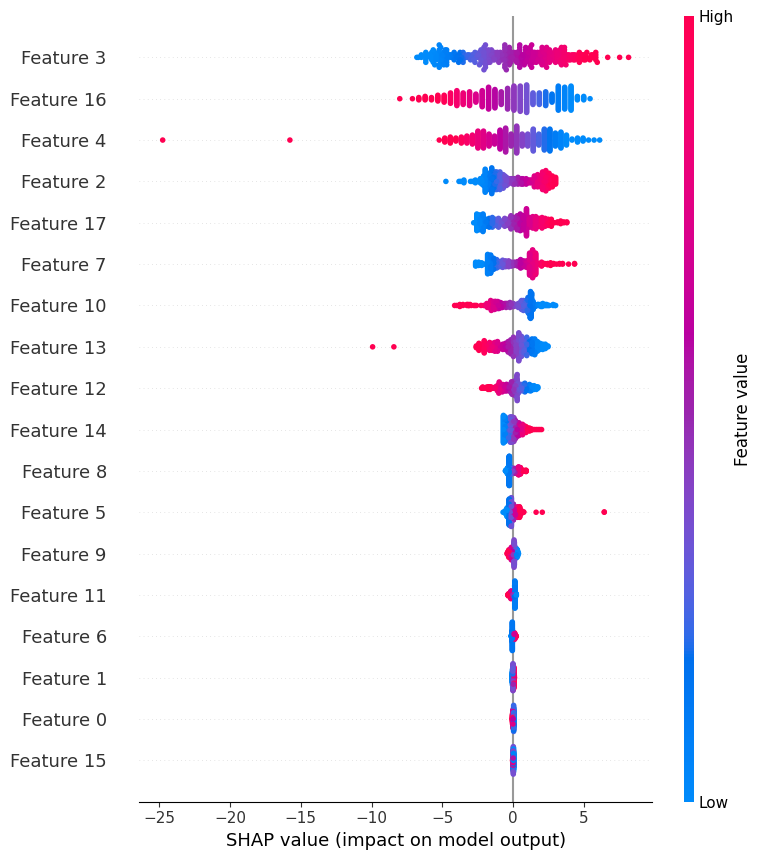

In [ ]:
shap.summary_plot(shap_values_scaled, X_train_scaled)

Finally, write a function which transforms shap values to Logistic Regression coefficients. Their relations are described in the [docs](https://shap.readthedocs.io/en/latest/generated/shap.explainers.Linear.html).



In [ ]:
def get_coef_from_shap_values(shap_values, X_train_scaled, center_data=True):
    if center_data:
        X_train_scaled = X_train_scaled - X_train_scaled.mean(0)
    coef = (shap_values.values * X_train_scaled).mean(0)
    return coef



In [ ]:
coef_from_shap = get_coef_from_shap_values(shap_values_scaled, X_train_scaled)

If everything is correct, the next assert should pass.

In [ ]:
assert np.allclose(coef_from_shap, lr_scaled_coef)

#### Training the GradientBoosting

In [ ]:
gb_basic = GradientBoostingClassifier(n_estimators=10)
gb_basic.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=10)

In [ ]:
gb_basic_feature_importances = gb_basic.feature_importances_

In [ ]:
gb_scaled = GradientBoostingClassifier(n_estimators=10)
gb_scaled.fit(X_train_scaled, y_train)

GradientBoostingClassifier(n_estimators=10)

In [ ]:
gb_scaled_feature_importances = gb_scaled.feature_importances_ # code here

In [ ]:

assert np.allclose(gb_basic_feature_importances, gb_scaled_feature_importances, atol=1e-1)
submission_dict['gb_basic_feature_importances'] = gb_basic_feature_importances


**Question:** Why are the feature importances so similar for scaled and unscaled data?

#### Using shap to explain trees ensemble solution

In [ ]:
explainer = shap.TreeExplainer(gb_scaled) # CODE HERE
shap_values = explainer.shap_values(X_train)

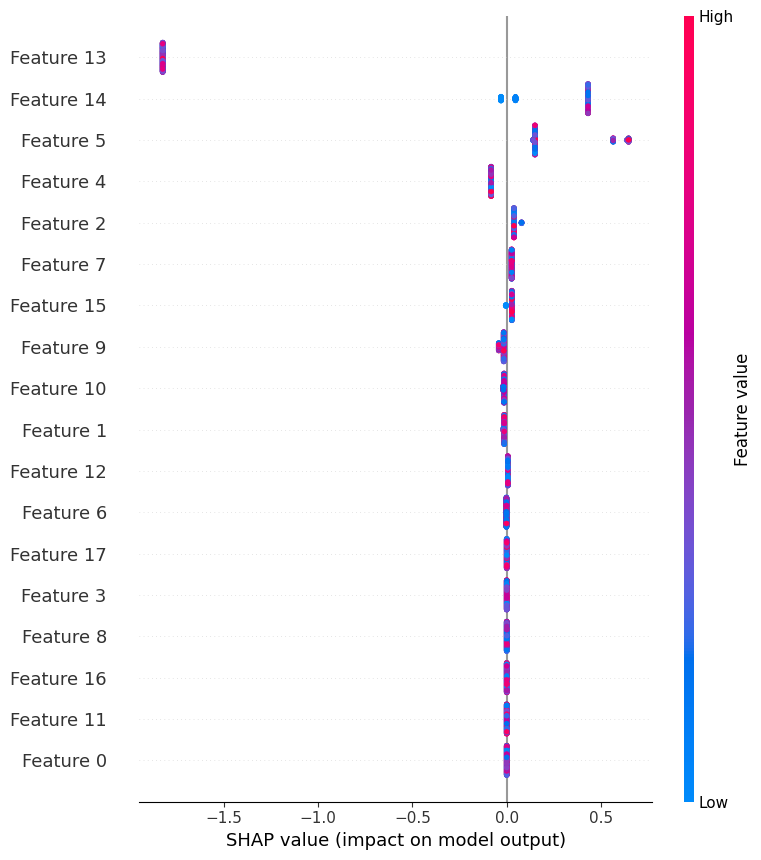

In [ ]:
shap.summary_plot(shap_values, X_train)

In [ ]:
gb_scaled_most_important_index = np.argmax(gb_scaled_feature_importances) # as answer

In [ ]:

assert isinstance(int(gb_scaled_most_important_index), int)
submission_dict['gb_scaled_most_important_index'] = gb_scaled_most_important_index


In [ ]:


np.save('submission_dict_hw08.npy', submission_dict, allow_pickle=True)
print('File saved to `submission_dict_hw.npy`')


File saved to `submission_dict_hw.npy`


note, you need to submit both `submission_dict_hw.npy` and `get_coef_from_shap_values` function code.